In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
matches_orig = pd.read_csv('datasets/original/matches.csv')
delivs_orig = pd.read_csv('datasets/original/deliveries.csv')
matches, delivs = matches_orig.copy(), delivs_orig.copy()

matches.to_pickle('pickles/matches.pkl')
delivs.to_pickle('pickles/delivs.pkl')

In [6]:
delivs.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [7]:
balls_faced = delivs.groupby('batsman')['bowler'].count()
balls_delivered = delivs.groupby('bowler')['bowler'].count()
runs_conceded = delivs.groupby('bowler')['total_runs'].sum()

In [8]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


<h3>Highest scoring batsmen over all seasons.</h3>

In [9]:
batsman_runs = delivs.groupby('batsman')[['batsman', 'batsman_runs']].sum()
batsman_runs['balls_faced'] = balls_faced
strike_rates = batsman_runs['batsman_runs']*100/batsman_runs['balls_faced']
batsman_runs['strike_rate'] = pd.Series(strike_rates)
batsman_runs_sorted = batsman_runs.sort_values(by='batsman_runs', ascending=False).reset_index()
batsman_runs_sorted

,batsman,batsman_runs,balls_faced,strike_rate
0,SK Raina,4548,3369,134.995548
1,V Kohli,4423,3494,126.588437
2,RG Sharma,4207,3274,128.497251
3,G Gambhir,4132,3433,120.361200
4,DA Warner,4014,2902,138.318401
...,...,...,...,...
456,Abdur Razzak,0,2,0.000000
457,S Kaushik,0,1,0.000000
458,S Ladda,0,10,0.000000
459,U Kaul,0,1,0.000000


<h4>Runs and Strike Rates</h4>

[]

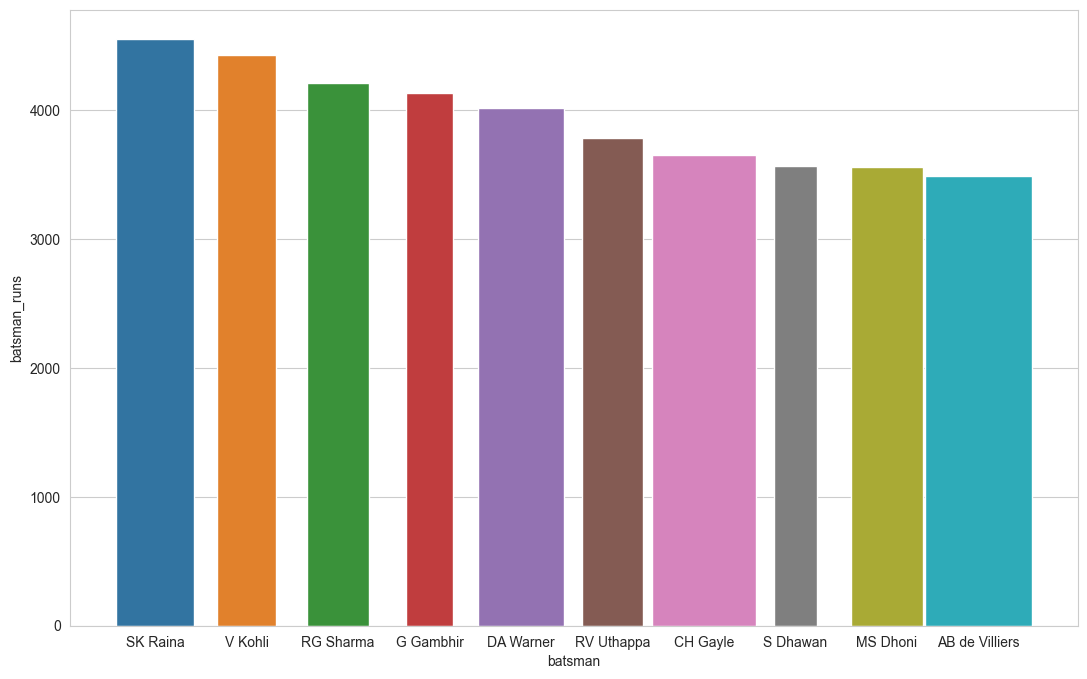

In [17]:
fig, ax = plt.subplots(1,1, figsize=(13,8))
ax = sns.barplot(x=batsman_runs_sorted.head(10)['batsman'], y=batsman_runs_sorted.head(10)['batsman_runs'], width=(batsman_runs_sorted.head(10)['strike_rate']/140)**4.5, ax=ax)
ax.plot()

In [18]:
# TO OPTIMIZE
delivs['if_dismissed'] = delivs['player_dismissed'].fillna(0)
for item in delivs['if_dismissed']:
    if not item == 0:
        delivs['if_dismissed'].replace(item, 1, inplace=True)
delivs['if_dismissed'].head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: if_dismissed, dtype: int64

In [27]:
ax.plot()

[]

<h3>Top wicket takers over all seasons</h3>

In [29]:
economy = runs_conceded/(wicket_takers['balls_delivered']/6)

In [30]:
wicket_takers = delivs.groupby('bowler')[['bowler', 'if_dismissed']].sum()
wicket_takers['balls_delivered'] = balls_delivered
wicket_takers['runs_conceded'] = runs_conceded
wicket_takers['economy'] = economy
wicket_takers.columns = ['wickets', 'balls_delivered', 'runs_conceded', 'economy']
wicket_takers_sorted = wicket_takers.sort_values(by='wickets', ascending=False).reset_index()
wicket_takers_sorted.head(10)

,bowler,wickets,balls_delivered,runs_conceded,economy
0,SL Malinga,170,2694,3034,6.757238
1,A Mishra,142,2703,3305,7.336293
2,DJ Bravo,137,2110,2815,8.004739
3,Harbhajan Singh,136,2989,3453,6.931415
4,PP Chawla,133,2594,3315,7.667695
5,R Vinay Kumar,125,2161,2976,8.262841
6,A Nehra,121,1974,2537,7.711246
7,Z Khan,119,2276,2860,7.539543
8,B Kumar,117,2054,2410,7.039922
9,R Ashwin,110,2359,2552,6.490886


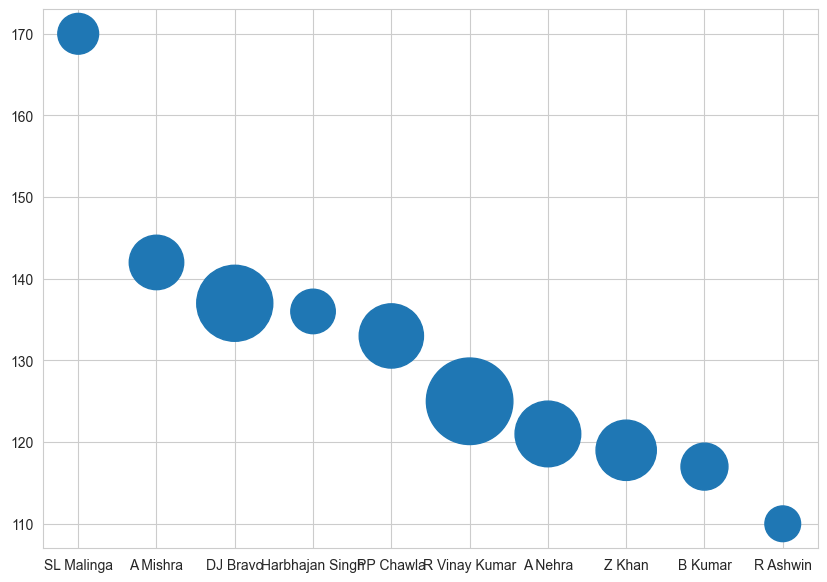

In [31]:
fig2, ax2 = plt.subplots(1,1, figsize = (10,7))
plt.scatter(x=wicket_takers_sorted.head(10)['bowler'], y=wicket_takers_sorted.head(10)['wickets'], s=(np.e**wicket_takers_sorted.head(10)['economy']))
plt.legend
plt.show()

<h4>Pickles</h4>

In [17]:
batsman_runs_sorted.to_pickle('pickles/batsman_runs_sorted.pkl')
balls_delivered.to_pickle('pickles/balls_delivered.pkl')
balls_faced.to_pickle('pickles/balls_faced.pkl')
matches.to_pickle('pickles/matches.pkl')
delivs.to_pickle('pickles/delivs.pkl', compression='zip')
wicket_takers_sorted.to_pickle('pickles/wicket_takers_sorted')

<h4>CSVs</h4>

In [18]:
wicket_takers_sorted = pd.read_pickle('pickles/wicket_takers_sorted')
wicket_takers_sorted.to_csv('datasets/top_bowlers.csv')

In [19]:
batsman_runs_sorted = pd.read_pickle('pickles/batsman_runs_sorted.pkl')
batsman_runs_sorted.to_csv('datasets/top_batsmen.csv')